In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.optimize as opt
import scipy.signal as scisig
import analysis_utils as au
import importlib

# Charge

In [2]:
charge_120 = 2.518321e-05

In [3]:
filename = 'D:/Lab Data/lorentz_force/sphere_20250327/20250328/Charge/10mVnoamp87kHz5.4e-8mbarchannelD.mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSDtmp = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))

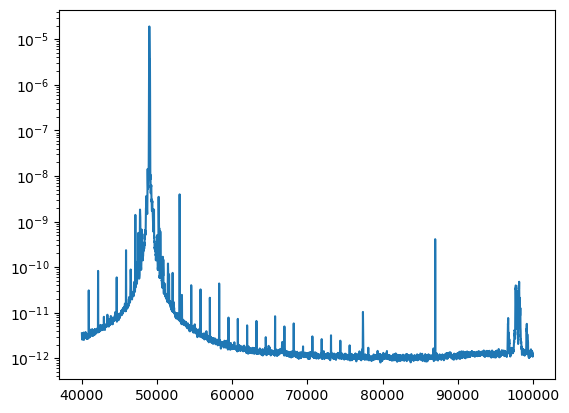

In [5]:
plt.plot(PSDtmp[0][4000:10000], PSDtmp[1][4000:10000])
plt.yscale('log')

In [5]:
dr = []
for i in range(int(len(tt)/10**5)):
    PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
    dr.append(PSD[1][8700])
freq = PSD[0]

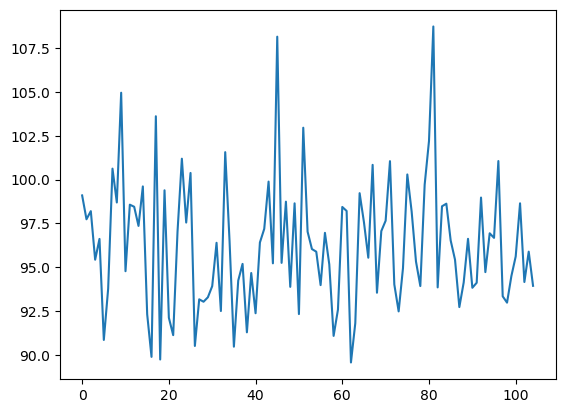

In [6]:
plt.plot(np.sqrt(dr)/charge_120*120)

In [7]:
np.mean(np.sqrt(dr)/charge_120*120)

96.26383

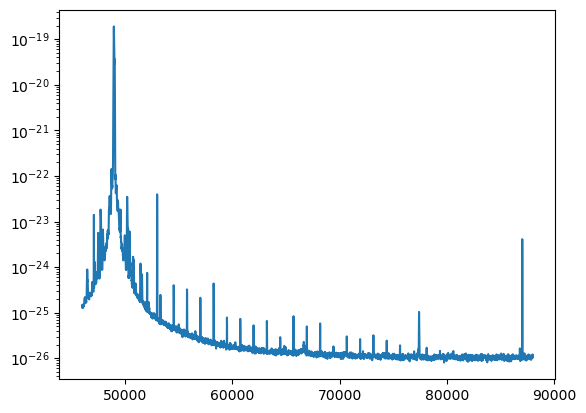

In [8]:
plt.plot(PSDtmp[0][4600:8800], PSDtmp[1][4600:8800]*10**(-14))
plt.yscale('log')

In [19]:
PSDtmp[1][8700]*10**(-14)

4.109721452039139e-24

In [27]:
w0 = 2*np.pi*49000 # central frequency
m = 4/3*np.pi*(83*10**(-9))**3*2200 # mass
q = 1.6*10**(-19)*40 # particle charge
EpV = 100# electric field per volt
V = 0.005 # applied voltage
wdr = 87000*2*np.pi # frequency range
y = 10*2*np.pi # Damping on particle
Fe = V*EpV*q # electric force
Sxx = Fe**2/m**2/2/((wdr**2-w0**2)**2+y**2*wdr**2)
print(Sxx)

4.430108172348037e-24


In [10]:
# Just making some graphs here

filename = 'D:/Lab Data/lorentz_force/sphere_20250327/20250328/Perm mag/2.5 V/Background/tt (1).mat'
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
dt = data['Tinterval'][0][0]
PSD = scisig.welch(tt[:10**7], fs=1/dt, nperseg=int(1/dt/10))

Text(0.5, 0, 'Frequency (kHz)')

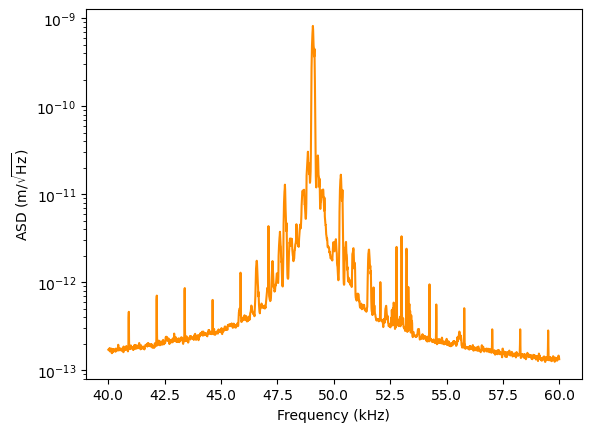

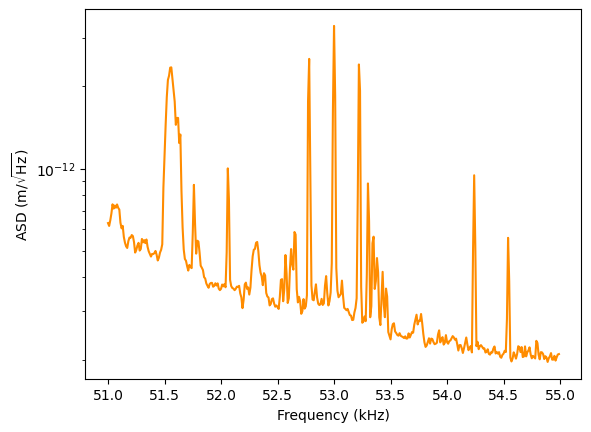

In [29]:
lb = 4000
ub = 6000
plt.plot(PSD[0][lb:ub]/1000, np.sqrt(PSD[1][lb:ub]*10**(-14)), color = 'darkorange')
plt.yscale('log')
plt.ylabel('ASD (m/$\sqrt{\mathrm{Hz}}$)')
plt.xlabel('Frequency (kHz)')

plt.figure()
lb = 5100
ub = 5500
plt.plot(PSD[0][lb:ub]/1000, np.sqrt(PSD[1][lb:ub]*10**(-14)), color = 'darkorange')
plt.yscale('log')
plt.ylabel('ASD (m/$\sqrt{\mathrm{Hz}}$)')
plt.xlabel('Frequency (kHz)')

In [23]:
lb = 5295
ub = 5305
area_bg = np.trapz(PSD[1][lb:ub], PSD[0][lb:ub])
lb = 5190
ub = 5200
area_n1 = np.trapz(PSD[1][lb:ub], PSD[0][lb:ub])
lb = 5395
ub = 5405
area_n2 = np.trapz(PSD[1][lb:ub], PSD[0][lb:ub])
area_n = (area_n1 + area_n2)/2
print(np.sqrt(area_bg/area_n))

4.516989045948636


# B field

In [67]:
path = 'D:/Lab Data/lorentz_force/sphere_20250327/20250328/Perm mag/2.5 V/Mag 3/'
files = ['nomag', 'mag', 'nomag2', 'mag2', 'nomag3']
end = '.mat'
peak_height = []
noise = []
PSDs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    for i in range(int(len(tt)/10**5)):
        PSD = scisig.welch(tt[i*10**5:(i+1)*10**5], fs=1/dt, nperseg=int(1/dt/10))
        peak_height.append(PSD[1][5300])
        noise.append((PSD[1][5200]+PSD[1][5400])/2)
    PSD = scisig.welch(tt, fs=1/dt, nperseg=int(1/dt/10))
    PSDs.append(PSD[1])

freq = PSD[0]

In [68]:
ph_avr1 = []
for i in range(int(len(peak_height)/10)):
    ph_avr1.append(np.mean(peak_height[i*10:(i+1)*10]))

ph_avr2 = []
for i in range(int(len(peak_height)/100)):
    ph_avr2.append(np.mean(peak_height[i*100:(i+1)*100]))

n_avr1 = []
for i in range(int(len(noise)/10)):
    n_avr1.append(np.mean(noise[i*10:(i+1)*10]))

n_avr2 = []
for i in range(int(len(noise)/100)):
    n_avr2.append(np.mean(noise[i*100:(i+1)*100]))

In [69]:
time = np.linspace(0, 50*len(files), len(peak_height))
time2 = np.linspace(0, 50*len(files), len(ph_avr1))
time3 = np.linspace(0, 50*len(files), len(ph_avr2))

In [71]:
peak_height = np.array(peak_height)
noise = np.array(noise)
ph_avr1 = np.array(ph_avr1)
n_avr1 = np.array(n_avr1)
ph_avr2 = np.array(ph_avr2)
n_avr2 = np.array(n_avr2)

Text(0.5, 0, 'time (s)')

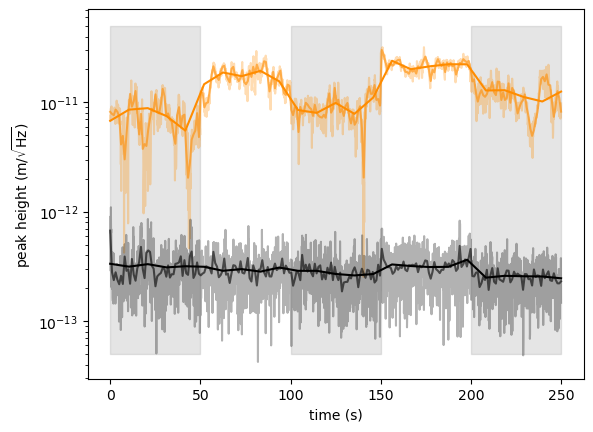

In [75]:
plt.plot(time, np.sqrt(peak_height*10**(-14)), color = 'darkorange', alpha = 0.3)
plt.plot(time2, np.sqrt(ph_avr1*10**(-14)), color = 'darkorange', alpha = 0.6)
plt.plot(time3, np.sqrt(ph_avr2*10**(-14)), color = 'darkorange')

plt.plot(time, np.sqrt(noise*10**(-14)), color = 'k', alpha = 0.3)
plt.plot(time2, np.sqrt(n_avr1*10**(-14)), color = 'k', alpha = 0.6)
plt.plot(time3, np.sqrt(n_avr2*10**(-14)), color = 'k')

plt.fill_between([0, 50], 0.5*10**(-13), 0.5*10**(-10), color = 'gray', alpha = 0.2)
plt.fill_between([100, 150], 0.5*10**(-13), 0.5*10**(-10), color = 'gray', alpha = 0.2)
plt.fill_between([200, 250], 0.5*10**(-13), 0.5*10**(-10), color = 'gray', alpha = 0.2)

plt.yscale('log')
plt.ylabel('peak height (m/$\sqrt{\mathrm{Hz}}$)')
plt.xlabel('time (s)')

In [ ]:
path = 'D:/Lab Data/lorentz_force/sphere_20250327/20250328/Perm mag/2.5 V/Mag 3/'
files = ['nomag', 'mag', 'nomag2', 'mag2', 'nomag3']
end = '.mat'

phis = []
Rs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    phis.append(phi)
    Rs.append(R)

In [25]:
PSD_filt = scisig.welch(tt_filt, fs=1/dt, nperseg=int(1/dt/10))

In [43]:
filename = path + 'mag' + end
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
ref = np.transpose(data['F'])[0]
dt = data['Tinterval'][0][0]
tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)

filename = path + 'mag2' + end
data = sio.loadmat(filename)
tt = np.transpose(data['D'])[0]
ref2 = np.transpose(data['F'])[0]
dt = data['Tinterval'][0][0]
tt_filt2 = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)

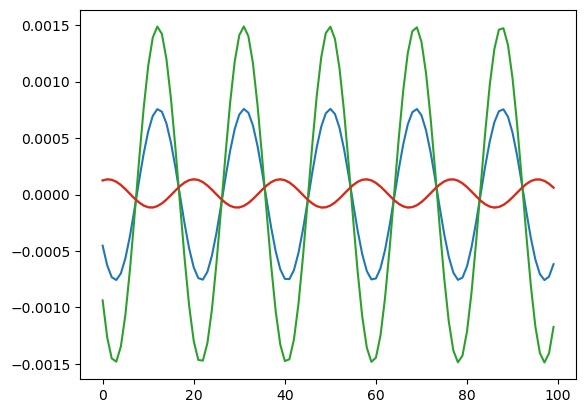

In [50]:
plt.plot(tt_filt[1101000:1101100])
plt.plot(ref[1101000:1101100]/10**4)

plt.plot(tt_filt2[101004:101104])
plt.plot(ref2[101004:101104]/10**4)

In [91]:
phi_tot = np.array([])
for phi in phis:
    phi_tot = np.concatenate((phi_tot, phi))

R_tot = np.array([])
for R in Rs:
    R_tot = np.concatenate((R_tot, R))

phi_tot = phi_tot[::100000]
R_tot = R_tot[::100000]

In [92]:
phi_avr1 = []
for i in range(int(len(phi_tot)/10)):
    phi_avr1.append(np.mean(phi_tot[i*10:(i+1)*10]))

phi_avr2 = []
for i in range(int(len(phi_tot)/100)):
    phi_avr2.append(np.mean(phi_tot[i*100:(i+1)*100]))

R_avr1 = []
for i in range(int(len(R_tot)/10)):
    R_avr1.append(np.mean(R_tot[i*10:(i+1)*10]))

R_avr2 = []
for i in range(int(len(R_tot)/100)):
    R_avr2.append(np.mean(R_tot[i*100:(i+1)*100]))

In [93]:
time = np.linspace(0, 50*len(files), len(phi_tot))
time2 = np.linspace(0, 50*len(files), len(phi_avr1))
time3 = np.linspace(0, 50*len(files), len(phi_avr2))

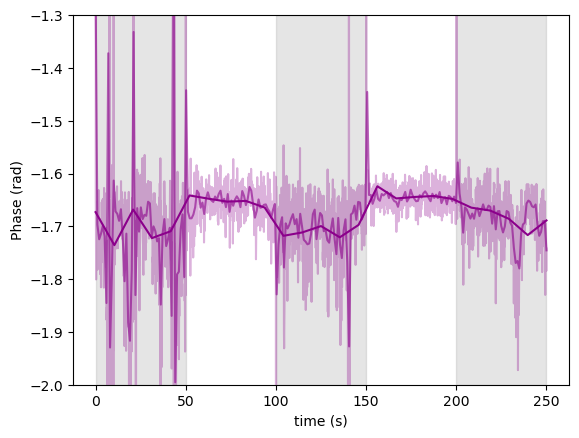

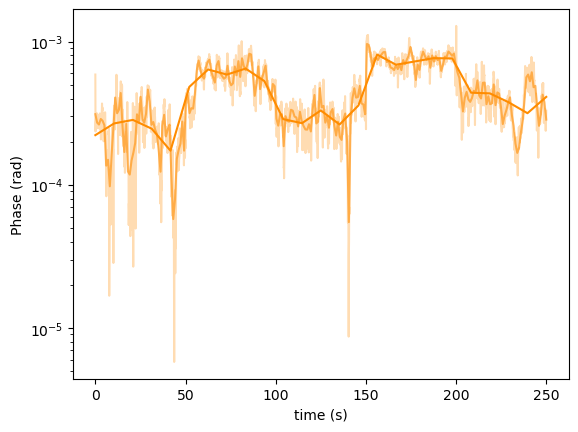

In [94]:
plt.plot(time, phi_tot, 'darkmagenta', alpha = 0.3)
plt.plot(time2, phi_avr1, 'darkmagenta', alpha = 0.6)
plt.plot(time3, phi_avr2, 'darkmagenta', alpha = 1)

plt.fill_between([0, 50], -2, -1.3, color = 'gray', alpha = 0.2)
plt.fill_between([100, 150], -2, -1.3, color = 'gray', alpha = 0.2)
plt.fill_between([200, 250], -2, -1.3, color = 'gray', alpha = 0.2)

plt.ylabel('Phase (rad)')
plt.xlabel('time (s)')

plt.ylim(-2, -1.3)

plt.figure()

plt.plot(time, R_tot, 'darkorange', alpha = 0.3)
plt.plot(time2, R_avr1, 'darkorange', alpha = 0.6)
plt.plot(time3, R_avr2, 'darkorange', alpha = 1)

#plt.fill_between([0, 50], -2, -1.3, color = 'gray', alpha = 0.2)
#plt.fill_between([100, 150], -2, -1.3, color = 'gray', alpha = 0.2)
#plt.fill_between([200, 250], -2, -1.3, color = 'gray', alpha = 0.2)

plt.ylabel('Phase (rad)')
plt.xlabel('time (s)')
plt.yscale('log')
#plt.ylim(-2, -1.3)

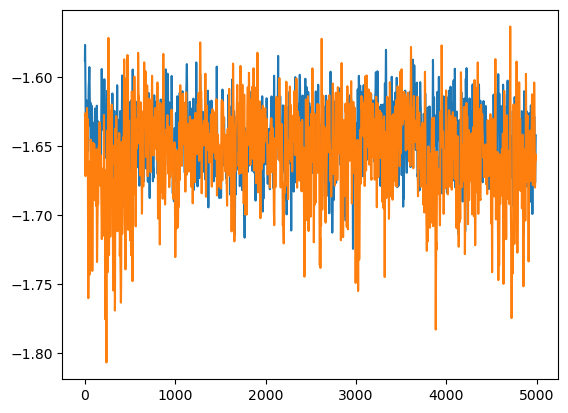

In [22]:
plt.plot(phis[3][100000::10000])
plt.plot(phis[1][100000::10000])

In [49]:
path = 'D:/Lab Data/lorentz_force/sphere_20250327/20250328/Perm mag/2.5 V/Background/'
files = ['tt (1)']
end = '.mat'

phis = []
Rs = []
for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    ref = np.transpose(data['F'])[0]
    dt = data['Tinterval'][0][0]

    time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:])
    demod2 = 2*np.sqrt(R2[1:])*np.cos(-theta+53000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 53000-100, 53000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    phis.append(phi)
    Rs.append(R)

In [55]:
path = 'D:/Lab Data/lorentz_force/sphere_20250327/20250328/Perm mag/2.5 V/Background/'
files = ['tt (1)']
end = '.mat'

phis52 = []
Rs52 = []

phis54 = []
Rs54 = []

for i in files:
    filename = path + str(i) + end
    data = sio.loadmat(filename)
    tt = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]

    #time, R2, theta, R2_filt, theta_filt = au.lockin(ref-np.mean(ref), fs = int(1/dt), demod_freq = 53000, BW_pre = 0, BW = 100, BW2 = 1, mode = 'R')
    demod = 1.25*np.cos(52000*2*np.pi*time[1:])
    demod2 = 1.25*np.cos(52000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 51950-100, 51950+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    phis52.append(phi)
    Rs52.append(R)

    demod = 1.25*np.cos(54000*2*np.pi*time[1:])
    demod2 = 1.25*np.cos(54000*2*np.pi*time[1:]+np.pi/2)
    tt_filt = au.butter_bandpass_filter(tt[1:], 54000-100, 54000+100, fs = int(1/dt), order = 3)
    X_tt = tt_filt[:]*demod
    Y_tt = tt_filt[:]*demod2
    X_tt_filt = au.butter_lowpass_filter(X_tt, 10, fs = int(1/dt), order = 3)
    Y_tt_filt = au.butter_lowpass_filter(Y_tt, 10, fs = int(1/dt), order = 3)
    phi= -2*np.arctan(X_tt_filt[1:]/Y_tt_filt[1:])
    R = np.sqrt(X_tt_filt[1:]**2+Y_tt_filt[1:]**2)
    phis54.append(phi)
    Rs54.append(R)

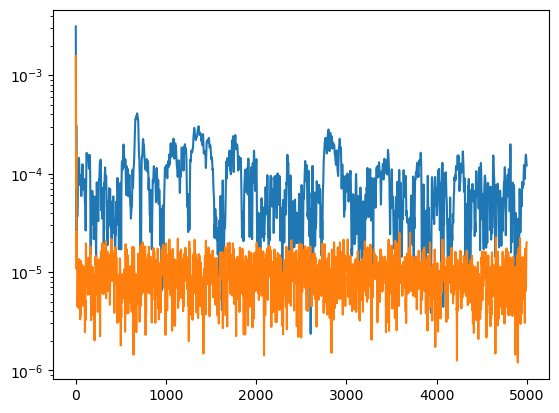

In [56]:
plt.plot(Rs[0][::10000])
plt.plot((Rs52[0]+Rs54[0])[::10000]/2)
plt.yscale('log')

In [57]:
np.mean(Rs[0][1000000:])/np.mean((Rs52[0][1000000:]+Rs54[0][1000000:])/2)

8.56065517553694

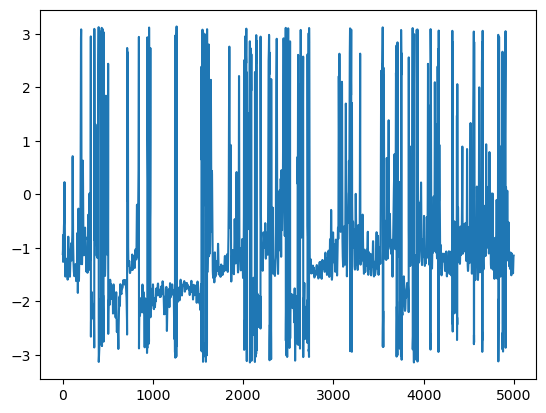

In [66]:
plt.plot(phis[0][::10000])
#plt.plot((phis52[0])[::10000])

In [61]:
phis

[array([-1.11451143, -1.11450944, -1.11450746, ..., -1.14384693,
        -1.14384693, -1.14384693])]